# Pandas

Para este primer ejercicio se utilizará unicamente pandas como viene estándar y se medirán los tiempos de ejecución

## Carga de datos

Los datos que se utilizara para este ejercicio vienen de la base de datos de mongo son comentarios de facebook y el archivo tiene un peso de 466,5 MB

In [1]:
import timeit
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')

In [3]:
def plot_time(time_list, name):
    plt.figure(figsize=(14, 4))
    p = sum(time_list) / num
    plt.scatter(range(len(load_data)), time_list, color='blue')
    plt.title('Tiempo por ejecución de: {}, tiempo promedio {} seg'.format(name, round(p, 3)))
    plt.hlines(y=p, xmin=0, xmax=len(time_list), color='red')
    plt.ylabel('Tiempo en segundos')
    plt.xlabel('Ejecuciones')
    plt.show()

In [4]:
# numero de veces a repetir cada prueba
num = 5

In [8]:
load_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df = pd.read_csv('../../Data_Test/Data_sample_com_fb/facebook_lib_facebook_comments.csv')
    load_data.append(timeit.default_timer() - start_time)

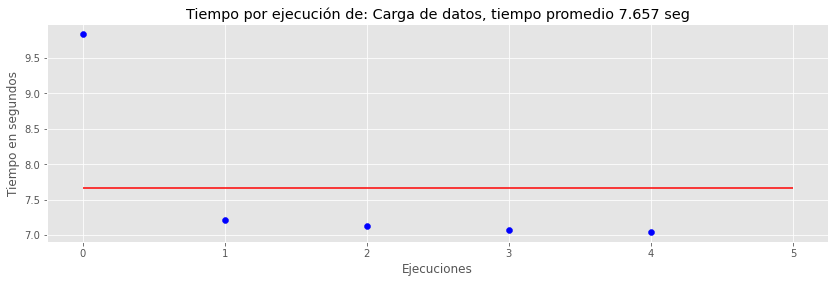

In [9]:
plot_time(load_data, name='Carga de datos')

In [10]:
df.columns

Index(['_id', 'id', 'created_at', 'post_id', 'comment_id', 'parent_id',
       'created_time', 'attachment', 'comment_count', 'like_count', 'from_id',
       'from_name', 'message', 'message_tags', 'message_google_json',
       'user_id'],
      dtype='object')

In [12]:
len(df)

1105052

In [13]:
df.head()

_id  id                created_at  \
0  5eb99b6ea5f2a7c4cc612de8   1  2020-05-11T18:37:34.583Z   
1  5eb99b70a5f2a7c4cc612de9   2  2020-05-11T18:37:35.903Z   
2  5eb9a2293772a957c15946f0   3  2020-05-11T19:06:17.479Z   
3  5eb9a22a3772a957c15946f1   4  2020-05-11T19:06:18.124Z   
4  5eb9a22a3772a957c15946f2   5  2020-05-11T19:06:18.597Z   

                            post_id                           comment_id  \
0   305223166594201_955151721601339      955151721601339_955152131601298   
1     66336374178_10159306658879179  10159306658879179_10159306675164179   
2  660918873998894_2945691988854893    2945691988854893_2949811961776229   
3  660918873998894_2945691988854893    2945691988854893_2949888485101910   
4  660918873998894_2945691988854893    2945691988854893_2949922401765185   

  parent_id              created_time  \
0       NaN  2020-05-11T15:07:22.000Z   
1       NaN  2020-05-11T15:21:28.000Z   
2       NaN  2020-05-10T15:49:19.000Z   
3       NaN  2020-05-10T16:26:28.000Z   
4       NaN  2020-05-10T16:43:20.000Z   

                                          attachment  comment_count  \
0                                                NaN              1   
1                                                NaN              0   
2  {\n    "media": {\n        "image": {\n       ...              0   
3  {\n    "media": {\n        "image": {\n       ...              0   
4                                                NaN              0   

   like_count       from_id       from_name  \
0           0           NaN             NaN   
1           0           NaN             NaN   
2           0  3.220466e+15    Gldys Fetiva   
3           0  3.264988e+15    Jasmin Perez   
4           0  2.914161e+15  Pedro Cardenas   

                                             message  \
0  Melissa Manuela yo no estaba mentalmente prepa...   
1                      Mira esa amor Victor Truyol P   
2                                                NaN   
3                                                NaN   
4                                        Bendiciones   

                                        message_tags  message_google_json  \
0  [{'id': '1541947385935787', 'length': 7, 'name...                  NaN   
1  [{'id': '3755264431212294', 'length': 15, 'nam...                  NaN   
2                                                NaN                  NaN   
3                                                NaN                  NaN   
4                                                NaN                  NaN   

   user_id  
0        1  
1        1  
2        1  
3        1  
4        1

In [16]:
extract_name = []
for i in range(num):
    start_time = timeit.default_timer()
    df = pd.read_csv('../../Data_Test/Data_sample_com_fb/facebook_lib_facebook_comments.csv')
    df['page_id'] = df.post_id.apply(lambda x: x.split('_')[0])
    extract_name.append(timeit.default_timer() - start_time)

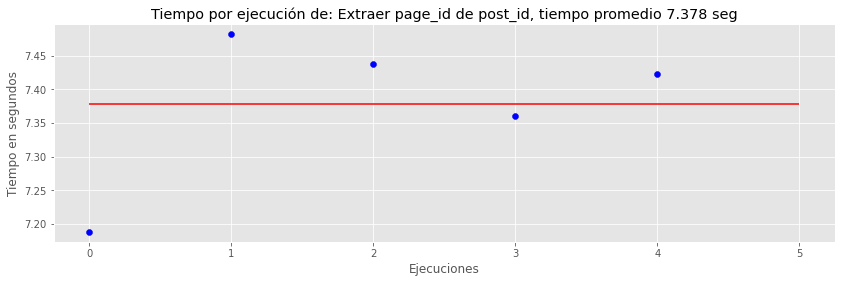

In [17]:
plot_time(extract_name, name='Extraer page_id de post_id')

## Agrupación por cuentas

En esta prueba se realizaran las siguientes operaciones:
1. Se agrupan los comentarios por el id de la cuenta
2. Se organizan por la cantidad de comentarios
3. Se reinicia el indice de los datos resultantes

**Nota:** Para poder comparar los datos con Dask se deben cargar los datos en el mismo código, pues esta librería carga los datos en memoria cuando se necesitan operar

In [19]:
g_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df = pd.read_csv('../../Data_Test/Data_sample_com_fb/facebook_lib_facebook_comments.csv')
    df['page_id'] = df.post_id.apply(lambda x: x.split('_')[0])
    df_group_page = df.groupby('page_id', as_index=False).id.count()  
    g_data.append(timeit.default_timer() - start_time)

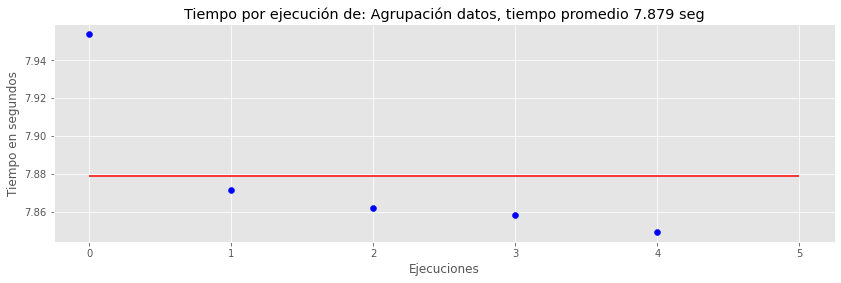

In [20]:
plot_time(g_data, name='Agrupación datos')

In [21]:
df_group_page.head()

page_id    id
0     100215329303   144
1  100741388001812   475
2  101606638202947  3551
3  101711747851266   646
4  101768651184639   991

In [22]:
s_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df_group_page = df_group_page.sort_values('id',ascending=False)
    s_data.append(timeit.default_timer() - start_time)

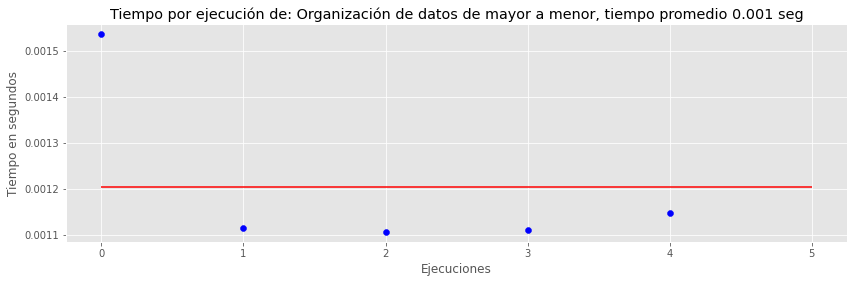

In [23]:
plot_time(s_data, name='Organización de datos de mayor a menor')

In [24]:
df_group_page.head()

page_id      id
78    305223166594201  264722
102   525628307514837  110538
35        14302129065   98137
54    170642519755132   69768
30   1384867925069071   61890

In [25]:
i_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df_group_page = df_group_page.reset_index(drop=True)
    i_data.append(timeit.default_timer() - start_time)

In [26]:
df_group_page.head()

page_id      id
0   305223166594201  264722
1   525628307514837  110538
2       14302129065   98137
3   170642519755132   69768
4  1384867925069071   61890

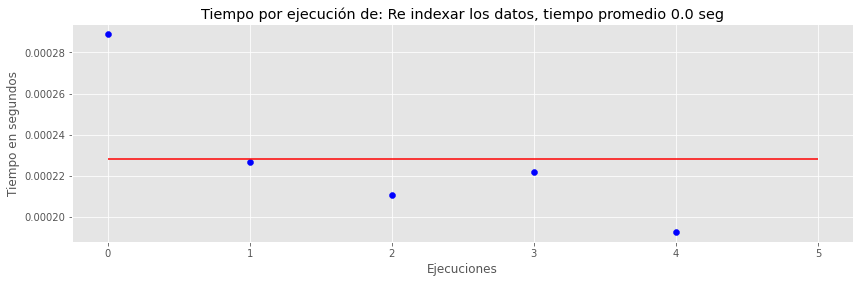

In [27]:
plot_time(i_data, name='Re indexar los datos')

In [28]:
df_group_page.head()

page_id      id
0   305223166594201  264722
1   525628307514837  110538
2       14302129065   98137
3   170642519755132   69768
4  1384867925069071   61890

## Agrupación de datos por cuentas y publicaciones

En esta prueba se realizaran las siguientes operaciones:
1. Se agrupan los comentarios por el id de la cuenta y la publicación es decir los comentarios por cuenta y publicación
2. Se organizan por la cantidad de comentarios
3. Se reinicia el indice de los datos resultantes

In [31]:
g_data2 = []
for i in range(num):
    start_time = timeit.default_timer()
    df = pd.read_csv('../../Data_Test/Data_sample_com_fb/facebook_lib_facebook_comments.csv')
    df['page_id'] = df.post_id.apply(lambda x: x.split('_')[0])    
    df_group_pub = df.groupby('post_id').agg({'page_id': 'last',
                                              'post_id': 'count'})
    g_data2.append(timeit.default_timer() - start_time)

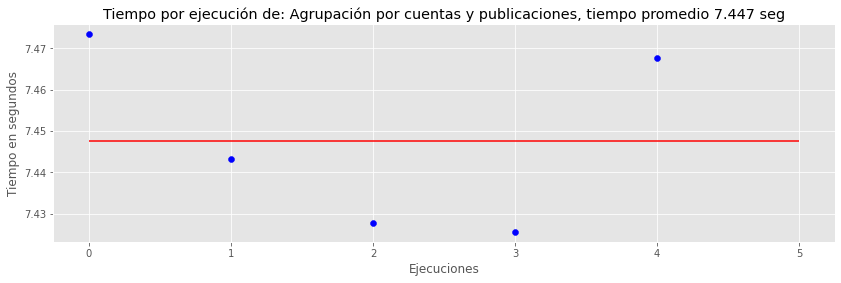

In [32]:
plot_time(g_data2, name='Agrupación por cuentas y publicaciones')

In [33]:
df_group_pub.head()

page_id  post_id
post_id                                              
100215329303_10158876361954304  100215329303        3
100215329303_10158886822644304  100215329303        2
100215329303_10158888567359304  100215329303        2
100215329303_10158890753284304  100215329303        1
100215329303_10158890845764304  100215329303        2

In [34]:
i_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df_group_pub = df_group_pub.reset_index(drop=True)
    i_data.append(timeit.default_timer() - start_time)

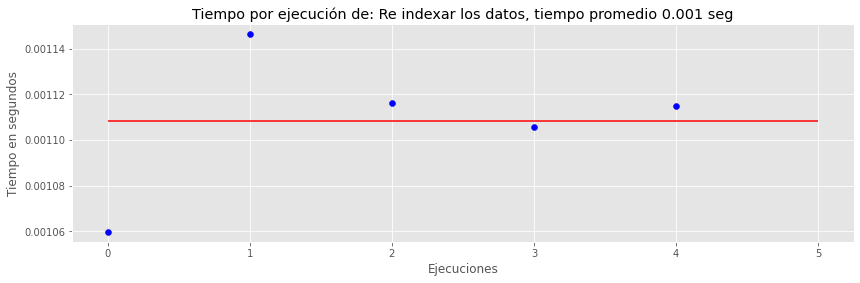

In [35]:
plot_time(i_data, name='Re indexar los datos')

In [36]:
df_group_pub.head()

page_id  post_id
0  100215329303        3
1  100215329303        2
2  100215329303        2
3  100215329303        1
4  100215329303        2

## Búsqueda de palabras en un dataframe

En este prueba se busca un vector de palabras dentro de los comentarios del dataframe, posteriormente estos datos se agruparan por cuenta

In [37]:
def words_filter(df, words):
    df_m = deepcopy(df)
    df_m["word"] = None
    df_m.message = df_m.message.apply(lambda x: str(x).lower())
    for i in range(len(df_m)):
        for word in words:
            if str(df_m.message.iloc[i]).find(str(word)) > 0:
                df_m.word.iloc[i] = "ok"
            else:
                continue
    
    df_m_filter = df_m[df_m.word == "ok"]
    return df_m_filter

In [38]:
words = [['perro', 'coronavirus'], ['rappy', 'domicilios.com', 'uber'], ['whatsapp']]

In [40]:
#df_2 = df.sample(n=20000)
df_2 = pd.read_csv('../../Data_Test/Data_sample_com_fb/facebook_lib_facebook_comments.csv')
find_w = []
for i in range(num):
    start_time = timeit.default_timer()
    df_all_w = pd.DataFrame()
    for i in words:
        temp1 = words_filter(df_2, i)
        temp1['page_id'] = temp1.post_id.apply(lambda x: x.split('_')[0]) 
        temp2 = temp1.groupby("page_id", as_index=False).id.count()
        df_all_w = pd.concat([df_all_w, temp2])
    find_w.append(timeit.default_timer() - start_time)

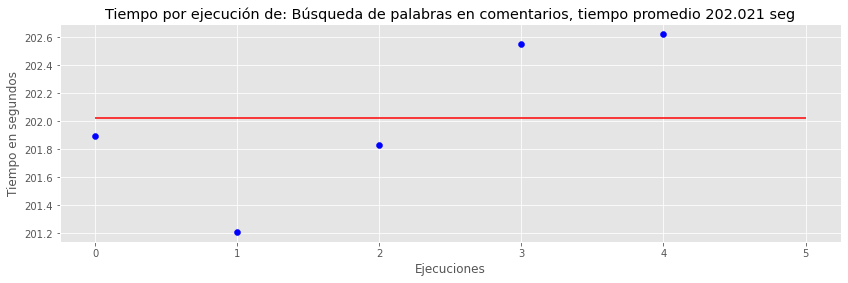

In [41]:
plot_time(find_w, name='Búsqueda de palabras en comentarios')

In [42]:
df_all_w

page_id   id
0    100741388001812    9
1    101606638202947    2
2    101711747851266    1
3   1119669518128815    1
4    114115315337739    1
..               ...  ...
36       66336374178   29
37        6657899956    3
38   674963205875675    2
39        9258148868  257
40       94960676664    1

[122 rows x 2 columns]